Hasil produksi: 5652.79 unit


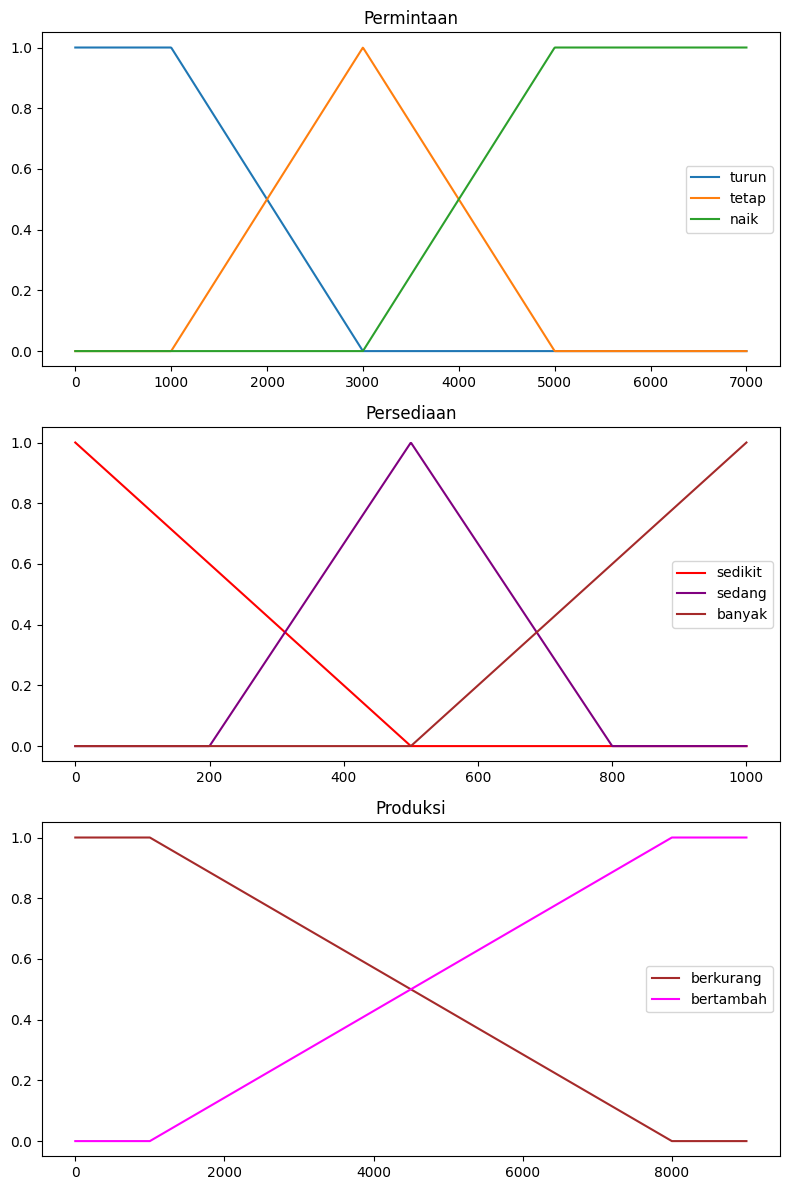

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan Permintaan
def permintaan_turun(x):
    return np.maximum(0, np.minimum(1, (3000 - x) / 2000))

def permintaan_tetap(x):
    return np.maximum(0, np.minimum((x - 1000) / 2000, (5000 - x) / 2000))

def permintaan_naik(x):
    return np.maximum(0, np.minimum(1, (x - 3000) / 2000))

# Fungsi keanggotaan Persediaan
def persediaan_sedikit(x):
    return np.maximum(0, np.minimum(1, (500 - x) / 500))

def persediaan_sedang(x):
    return np.maximum(0, np.minimum((x - 200) / 300, (800 - x) / 300))

def persediaan_banyak(x):
    return np.maximum(0, np.minimum(1, (x - 500) / 500))

# Fungsi keanggotaan Produksi
def produksi_berkurang(x):
    return np.maximum(0, np.minimum(1, (8000 - x) / 7000))

def produksi_bertambah(x):
    return np.maximum(0, np.minimum(1, (x - 1000) / 7000))

# Proses Inferensi Fuzzy
def fuzzy_inference(permintaan, persediaan):
    r1 = np.fmin(permintaan_turun(permintaan), persediaan_banyak(persediaan))  # Produksi berkurang
    r2 = np.fmin(permintaan_naik(permintaan), persediaan_sedikit(persediaan))  # Produksi bertambah

    # Agregasi dari semua aturan
    produksi_berkurang_agg = np.fmin(r1, produksi_berkurang(x_produksi))
    produksi_bertambah_agg = np.fmin(r2, produksi_bertambah(x_produksi))
    aggregated = np.fmax(produksi_berkurang_agg, produksi_bertambah_agg)

    return aggregated

# Defuzzifikasi
def defuzzifikasi(aggregated, x):
    return np.sum(aggregated * x) / np.sum(aggregated)

# Input Nilai Permintaan dan Persediaan
permintaan_input = 4000  # Contoh input permintaan
persediaan_input = 300   # Contoh input persediaan

# Domain
x_permintaan = np.linspace(0, 7000, 1000)
x_persediaan = np.linspace(0, 1000, 1000)
x_produksi = np.linspace(0, 9000, 1000)

# Inferensi dan Defuzzifikasi
aggregated = fuzzy_inference(permintaan_input, persediaan_input)
hasil_produksi = defuzzifikasi(aggregated, x_produksi)

# Tampilkan Hasil Produksi
print(f"Hasil produksi: {hasil_produksi:.2f} unit")

# Plot Membership Function
plt.figure(figsize=(8, 12))

# Plot Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_permintaan, permintaan_turun(x_permintaan), label="turun")
plt.plot(x_permintaan, permintaan_tetap(x_permintaan), label="tetap")
plt.plot(x_permintaan, permintaan_naik(x_permintaan), label="naik")
plt.title("Permintaan")
plt.legend()

# Plot Persediaan
plt.subplot(3, 1, 2)
plt.plot(x_persediaan, persediaan_sedikit(x_persediaan), label="sedikit", color="red")
plt.plot(x_persediaan, persediaan_sedang(x_persediaan), label="sedang", color="purple")
plt.plot(x_persediaan, persediaan_banyak(x_persediaan), label="banyak", color="brown")
plt.title("Persediaan")
plt.legend()

# Plot Produksi
plt.subplot(3, 1, 3)
plt.plot(x_produksi, produksi_berkurang(x_produksi), label="berkurang", color="brown")
plt.plot(x_produksi, produksi_bertambah(x_produksi), label="bertambah", color="magenta")
plt.title("Produksi")
plt.legend()

plt.tight_layout()
plt.show()
